# **LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# BMI: body mass index
# Outcome: seker hastasi veya degil

In [5]:
df.shape

(768, 9)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [73]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [95]:
# Dataseinin %1 i seker hastasi, %99 u saglikli olsa bu gibi data setlerine imbalanced data set denir.
# bu data setinde oyle bir durum yok. Outcome ortalamasi: 0.34
# %15 ve daha az olan durumlara unbalanced denilebilir.

# imbalanced datasetlerde accuracy yuksek cikar, bu yanilticidir.


## Outlier Analysis

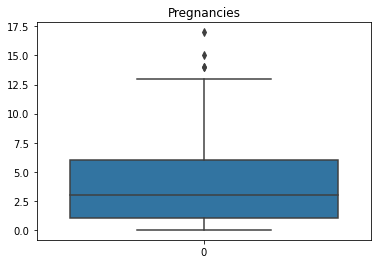

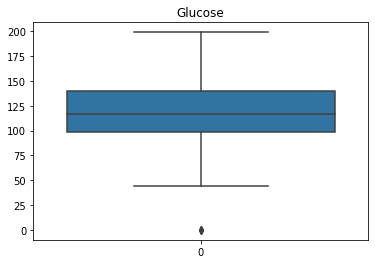

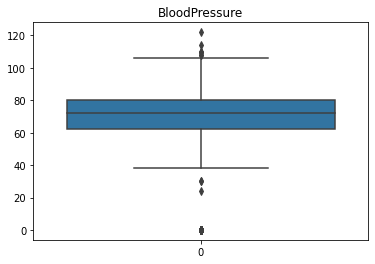

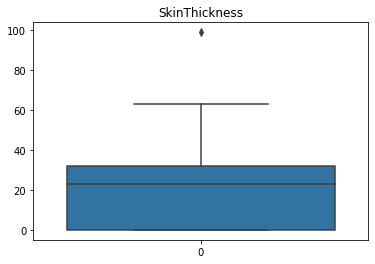

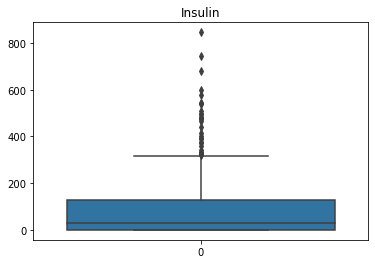

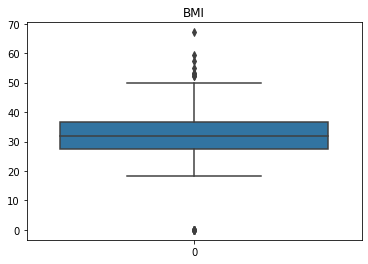

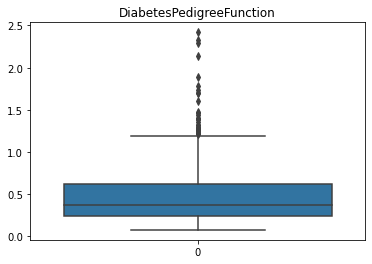

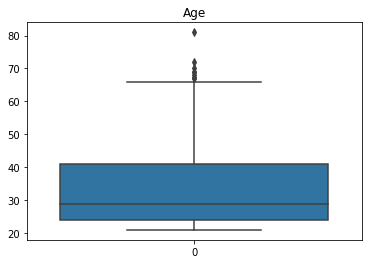

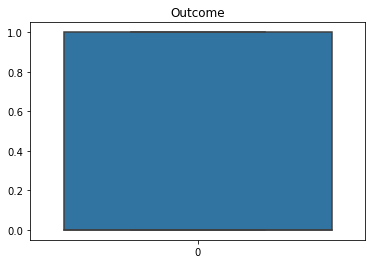

In [75]:
for i in df.columns:
    plt.figure(i)
    sns.boxplot(data=df[i], orient='v')
    plt.title(i) 

#### Pregnancies

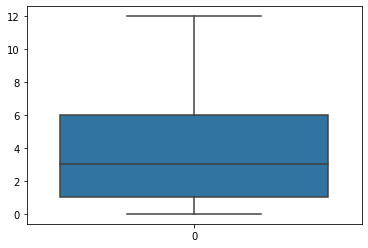

In [76]:
# drop outliers

df=df[df.Pregnancies<13]
sns.boxplot(data=df.Pregnancies, orient="v");

#### SkinThickness

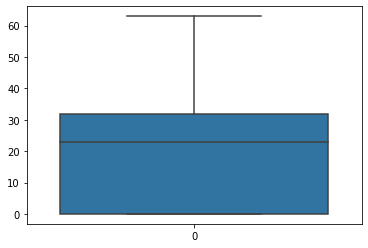

In [77]:
df=df[df.SkinThickness<70]
sns.boxplot(data=df.SkinThickness, orient="v");

#### Glucose

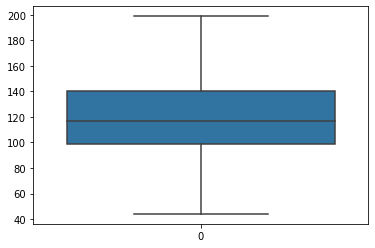

In [78]:
df=df[df.Glucose>0]
sns.boxplot(data=df.Glucose, orient="v");

#### Insulin

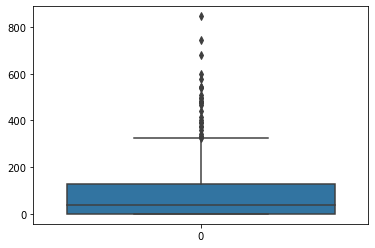

In [79]:
sns.boxplot(data=df.Insulin, orient="v");

> Domain bilgisi olarak yukaridaki degerler atilmamali

#### BloodPressure

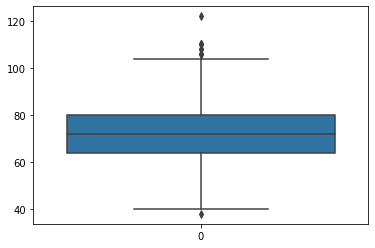

In [80]:
df=df[df.BloodPressure>35]

sns.boxplot(data=df.BloodPressure, orient="v");

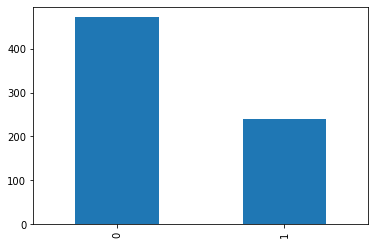

In [81]:
df.Outcome.value_counts().plot.bar();

In [82]:
df.shape

(711, 9)

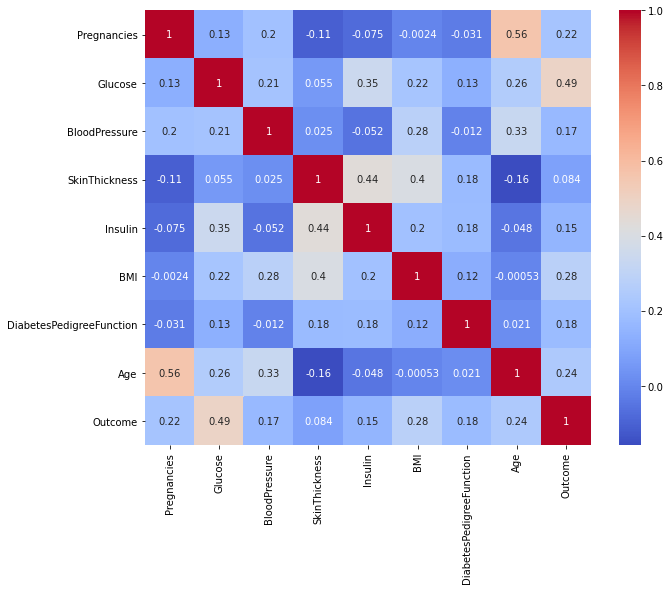

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True);

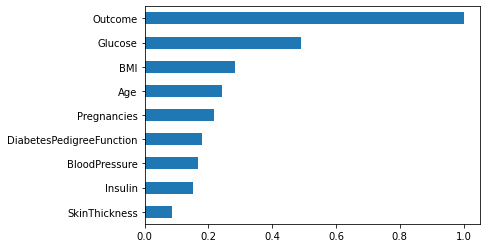

In [84]:
df.corr()["Outcome"].sort_values().plot.barh();

## Modeling

In [85]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_pred=model.predict(X_test)

In [89]:
confusion_matrix(y_test, y_pred)

array([[86, 10],
       [20, 27]], dtype=int64)

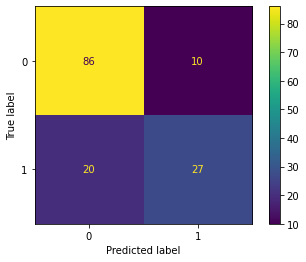

In [90]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test);

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        96
           1       0.73      0.57      0.64        47

    accuracy                           0.79       143
   macro avg       0.77      0.74      0.75       143
weighted avg       0.78      0.79      0.78       143



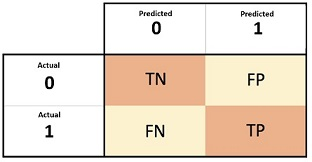

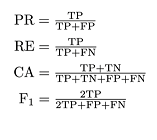

> FP: Type-1(α): hasta olmayana hasta denmesi
    
> FN: Type-2(β): hasta olana hasta değil denmesi

> Once recall a bakilir. Yani gercek hastalarin ne kadarini dogru tahmin ettigi onemlidir.

> Rapor ederken F1_score soylenir. 

> Imbalanced da accuracy e bakilmaz, Classification da ise accuracy onemi dusuktur.

> R2_score, accuracy ile alakali bir score dur, Classification da R2 score bakilmaz.

> Hangi parametrenin onemli oldugunda modellemenin amaci da onemlidir. mesela churn predictionlarda sonuclari iyi yorumlamak gerekir. recall=0.57 bile kullanmak kar getirebilecegi durumlar olabilir.